In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
df = pd.read_csv('../artifacts/raw.csv')

In [257]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [259]:
df.shape

(2461, 8)

In [260]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

Total of 2,461 Rows of data, and 8 different features.
Date column is object type, no need to change to Date Time, will be dropped.

In [261]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

- 521 Null values in Note.
- 635 Null Values in Subcategory

In [262]:
df.loc[pd.isna(df['Subcategory']), 'Subcategory'] = df.loc[pd.isna(df['Subcategory']), 'Category']

In [263]:
df['Subcategory'].isna().sum()

np.int64(0)

In [264]:
df[df.duplicated()]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
768,1/12/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
868,1/11/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
922,1/10/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
1007,1/9/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
1109,1/8/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
1210,1/7/2017,Saving Bank account 1,Recurring Deposit,Recurring Deposit,NaN,1000.0,Transfer-Out,INR
1362,12/5/2017,Cash,Food,Tea,NaN,10.0,Expense,INR
1816,10/11/2016,Saving Bank account 1,Investment,Mutual fund,NaN,1000.0,Expense,INR
1854,10/10/2016,Saving Bank account 1,Investment,Mutual fund,NaN,1000.0,Expense,INR


- Each Duplicate transaction is made on different days, So they arem't actually duplicates.

In [265]:
df.dtypes

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

In [266]:
df.nunique()

Date              1611
Mode                12
Category            50
Subcategory        129
Note              1057
Amount             550
Income/Expense       3
Currency             1
dtype: int64

- INR is the only unique currency.

In [267]:
df['Category'].value_counts().head(20)

Category
Food                     907
Transportation           307
Household                176
subscription             143
Other                    126
Investment               103
Health                    94
Family                    71
Apparel                   47
Recurring Deposit         47
Money transfer            43
Salary                    43
Gift                      30
Public Provident Fund     29
Equity Mutual Fund E      22
Beauty                    22
Gpay Reward               21
Education                 18
Saving Bank account 1     17
maid                      17
Name: count, dtype: int64

In [268]:
df.Mode.value_counts()

Mode
Saving Bank account 1    1223
Cash                     1046
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: count, dtype: int64

Transactions through Bank is most preferred by the people with 49.7% of total transactions, Cash serves as the secondary option with 42.5%. 

In [269]:
df['Mode'].unique()

array(['Cash', 'Saving Bank account 1', 'Credit Card',
       'Equity Mutual Fund B', 'Debit Card', 'Share Market Trading',
       'Saving Bank account 2', 'Equity Mutual Fund C',
       'Equity Mutual Fund A', 'Equity Mutual Fund D', 'Fixed Deposit',
       'Recurring Deposit'], dtype=object)

In [270]:
df['IsExpense'] = df['Income/Expense'].apply(lambda x: 1 if x == 'Expense' else 0)

In [271]:
for col in df.columns:
    if col in ['Date','Note','Amount']:
        continue
    print(f'Categories in "{col}" variable: {df[col].unique()}')
    print('----------------------------------------------------------------------------')
    

Categories in "Mode" variable: ['Cash' 'Saving Bank account 1' 'Credit Card' 'Equity Mutual Fund B'
 'Debit Card' 'Share Market Trading' 'Saving Bank account 2'
 'Equity Mutual Fund C' 'Equity Mutual Fund A' 'Equity Mutual Fund D'
 'Fixed Deposit' 'Recurring Deposit']
----------------------------------------------------------------------------
Categories in "Category" variable: ['Transportation' 'Food' 'subscription' 'Festivals' 'Other'
 'Small Cap fund 2' 'Small cap fund 1' 'Family' 'Equity Mutual Fund E'
 'Apparel' 'Public Provident Fund' 'Saving Bank account 1' 'Gift' 'Salary'
 'Household' 'Dividend earned on Shares' 'Interest' 'Life Insurance'
 'Beauty' 'Health' 'Money transfer' 'maid' 'Culture' 'Tax refund'
 'Tourism' 'Share Market' 'Self-development' 'Amazon pay cashback'
 'Education' 'scrap' 'Petty cash' 'Documents' 'Gpay Reward' 'Social Life'
 'Equity Mutual Fund A' 'Maturity amount' 'Fixed Deposit'
 'Equity Mutual Fund C' 'Equity Mutual Fund F' 'Recurring Deposit'
 'Saving Ban

In [272]:
df[df['Category'].str.contains('mutual', case=False, na=False)]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,IsExpense
19,7/9/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
83,7/8/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
162,7/7/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
247,7/6/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
302,7/5/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
375,7/4/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
464,8/3/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
545,7/2/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0
634,12/1/2018,Saving Bank account 1,Equity Mutual Fund A,Equity Mutual Fund A,NaN,1000.0,Transfer-Out,INR,0
647,7/1/2018,Saving Bank account 1,Equity Mutual Fund E,Equity Mutual Fund E,NaN,1000.0,Transfer-Out,INR,0


In [273]:
df['Category'] = df['Category'].replace(
    to_replace= r'Equity Mutual Fund [A-Z]',
    value= 'Mutual Funds',
    regex=True
)
df['Category'] = df['Category'].replace(
    to_replace= r'Small Cap fund [0-2]',
    value= 'Mutual Funds',
    regex=True
)
df['Category'] = df['Category'].replace(
    to_replace= r'Saving Bank account [0-2]',
    value= 'Mutual Funds',
    regex=True
)

In [274]:
df[df['Mode'].str.contains('bank', case=False, na=False)]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,IsExpense
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR,1
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,1
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR,1
10,13/09/2018,Saving Bank account 1,Mutual Funds,Small Cap fund 2,NaN,5000.0,Transfer-Out,INR,0
11,13/09/2018,Saving Bank account 1,Small cap fund 1,Small cap fund 1,NaN,5000.0,Transfer-Out,INR,0
...,...,...,...,...,...,...,...,...,...
2426,10/1/2015,Saving Bank account 1,Transportation,Transportation,travels - brc to pune,650.0,Expense,INR,1
2437,5/1/2015,Saving Bank account 1,Food,Food,dinner,135.0,Expense,INR,1
2442,4/1/2015,Saving Bank account 1,Other,Other,Public Provident Fund,10000.0,Expense,INR,1
2443,3/1/2015,Saving Bank account 1,Other,Other,cricket expenses,223.0,Expense,INR,1


In [275]:
df['Mode'] = df['Mode'].replace(
    to_replace= r'Saving Bank account [0-9]',
    value= 'Savings Bank',
    regex=True
)

df['Mode'] = df['Mode'].replace(
    to_replace= r'Equity Mutual Fund [A-Z]',
    value= 'Mutual Funds',
    regex=True
)

In [276]:
df['Mode'] = df['Mode'].replace({
    'Savings Bank': 'Bank',
    'Credit Card': 'Card',
    'Debit Card': 'Card',
    'Mutual Funds': 'Investment',
    'Fixed Deposit': 'Investment',
    'Recurring Deposit': 'Investment',
    'Share Market Trading': 'Investment'
})

In [277]:
df['TransactionType'] = df['Income/Expense'].replace({
    'Income': 'Income',
    'Expense': 'Expense',
    'Transfer-Out': 'Transfer'
})

In [278]:
df['Date']=df['Date'].str.split(' ').str[0]

In [279]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

df['IsWeekend'] = df['Weekday'].isin(['Sunday','Saturday']).astype(int)



C:\Users\kesha\AppData\Local\Temp\ipykernel_24560\3910743014.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')


C:\Users\kesha\AppData\Local\Temp\ipykernel_24560\3005497117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Income/Expense', palette='Set2')


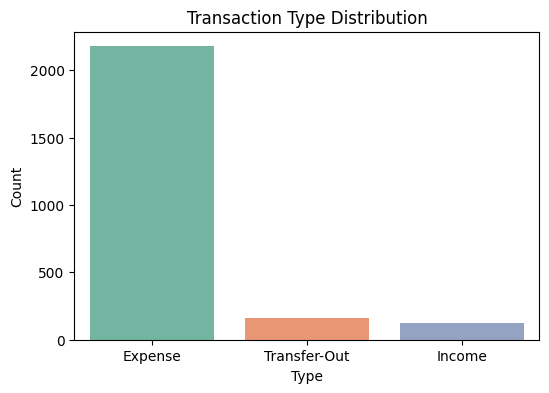

In [280]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Income/Expense', palette='Set2')
plt.title('Transaction Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\kesha\AppData\Local\Temp\ipykernel_24560\829680734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


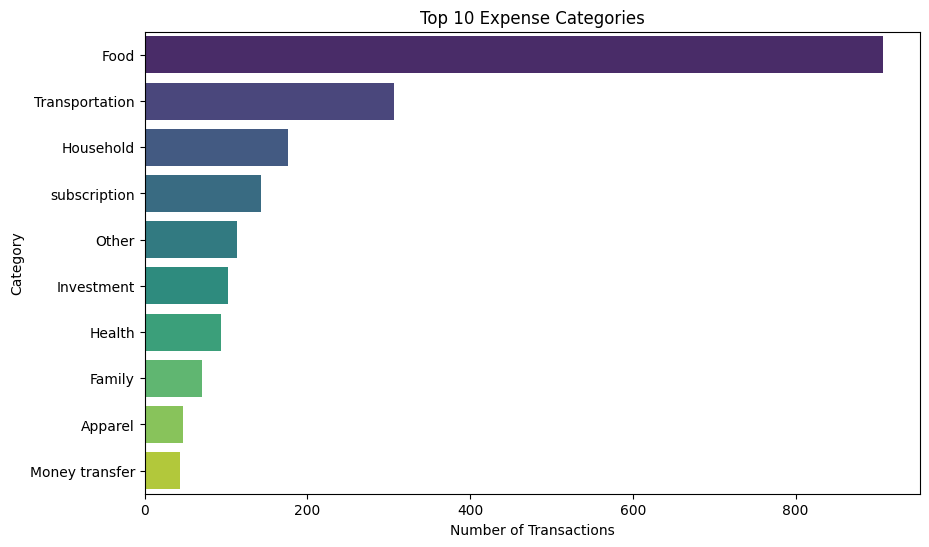

In [281]:
plt.figure(figsize=(10,6))
top_categories = df[df['Income/Expense'] == 'Expense']['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Expense Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()      

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2461 non-null   datetime64[ns]
 1   Mode             2461 non-null   object        
 2   Category         2461 non-null   object        
 3   Subcategory      2461 non-null   object        
 4   Note             1940 non-null   object        
 5   Amount           2461 non-null   float64       
 6   Income/Expense   2461 non-null   object        
 7   Currency         2461 non-null   object        
 8   IsExpense        2461 non-null   int64         
 9   TransactionType  2461 non-null   object        
 10  Year             2461 non-null   int32         
 11  Month            2461 non-null   int32         
 12  Day              2461 non-null   int32         
 13  Weekday          2461 non-null   object        
 14  IsWeekend        2461 non-null   int64  

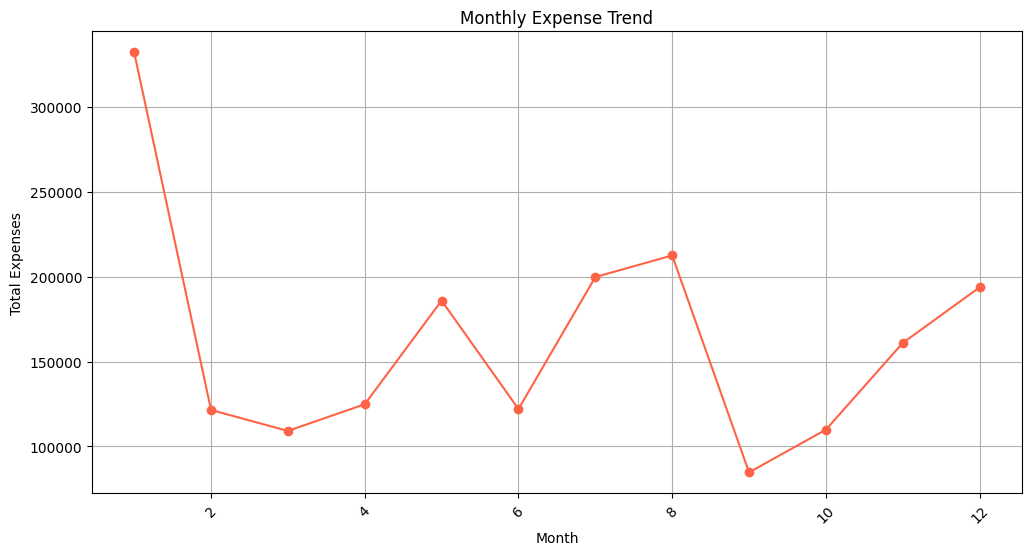

In [283]:
monthly_expense = df[df['IsExpense'] == 1].groupby('Month')['Amount'].sum()

plt.figure(figsize=(12,6))
monthly_expense.plot(marker='o', color='tomato')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

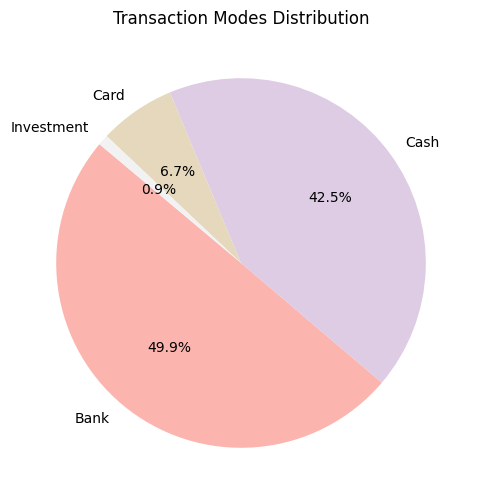

In [284]:
plt.figure(figsize=(6,6))
df['Mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Transaction Modes Distribution')
plt.ylabel('')
plt.show()

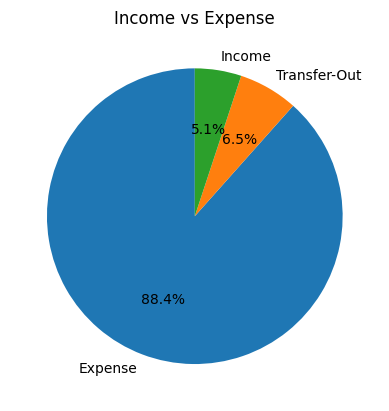

In [285]:
df['Income/Expense'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Income vs Expense')
plt.ylabel('')
plt.show()

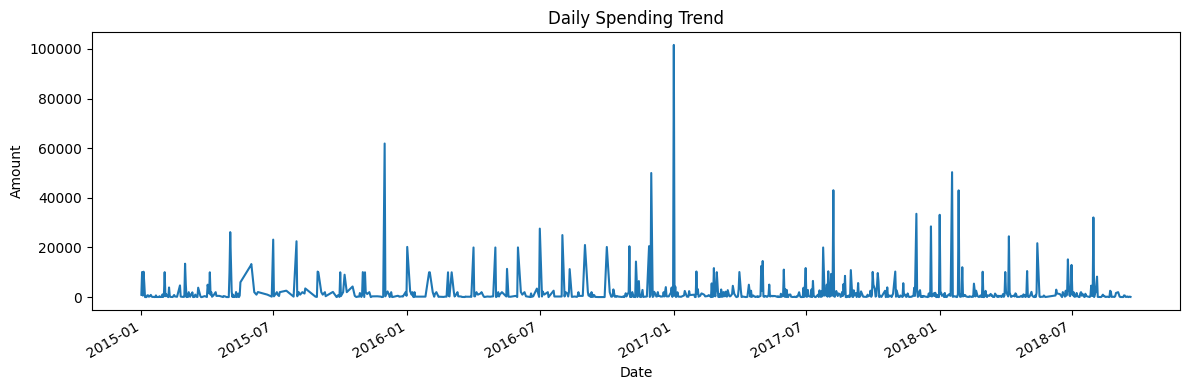

In [286]:
df_daily = df[df['IsExpense']==1].groupby('Date')['Amount'].sum()

df_daily.plot(figsize=(12, 4), title='Daily Spending Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


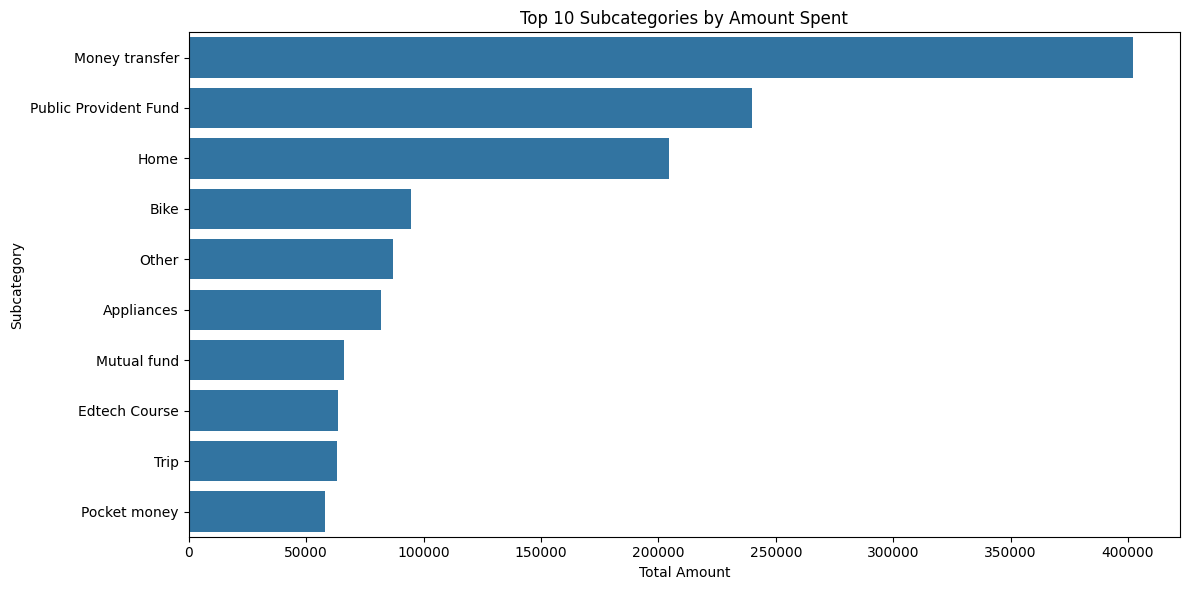

In [287]:
plt.figure(figsize=(12, 6))
top_subcat = df[df.IsExpense == 1].groupby('Subcategory')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_subcat.values, y=top_subcat.index)
plt.title('Top 10 Subcategories by Amount Spent')
plt.xlabel('Total Amount')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()
